In [1]:
pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 855.1 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82816 sha256=3e42a03386cb7e768da682d82f56319386b5c731804b3ba8128a6749b9318c7f
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55622 sha256=ed021c4abe13a563f2e31673da8cb28948cbaf515b823b843540ae731f0725f5
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

import umap.umap_ as umap

In [80]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [82]:
# data = pd.read_csv("/content/drive/MyDrive/UALR/GA/GA/Repository/paraview/input_data/input_beach_full_data.csv")
data = pd.read_csv("/content/drive/MyDrive/UALR/GA/GA/Repository/paraview/umap/backup/removed_data.csv")

In [83]:
data.describe()

,Water Temperature,Turbidity,Transducer Depth,Wave Height,Wave Period,Battery Life
count,1329.000000,1329.000000,740.000000,1329.000000,1329.000000,1329.000000
mean,18.022649,5.059729,1.545858,-150.307705,-146.264861,11.106396
std,2.751655,8.330939,0.169061,3877.838210,3877.995896,0.539589
min,11.200000,0.000000,-0.082000,-99999.992000,-100000.000000,9.300000
25%,16.300000,1.500000,1.439000,0.100000,3.000000,10.700000
50%,18.400000,2.650000,1.533000,0.152000,4.000000,11.100000
75%,19.900000,4.880000,1.699000,0.233000,5.000000,11.400000
max,24.200000,75.090000,1.880000,0.740000,10.000000,13.200000


## Data Cleaning

In [84]:
# Count missing values in each column
print(data.isna().sum())

Beach Name                       0
Measurement Timestamp            0
Water Temperature                0
Turbidity                        0
Transducer Depth               589
Wave Height                      0
Wave Period                      0
Battery Life                     0
Measurement Timestamp Label      0
Measurement ID                   0
dtype: int64


In [85]:
# transducer column has many null values, so dropping it
data.drop(columns='Transducer Depth',inplace=True)

In [86]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1324    False
1325    False
1326    False
1327    False
1328    False
Length: 1329, dtype: bool

In [87]:
data['Measurement Timestamp'] = pd.to_datetime(data['Measurement Timestamp'])

In [88]:
data.head()

,Beach Name,Measurement Timestamp,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life,Measurement Timestamp Label,Measurement ID
0,Ohio Street Beach,2018-06-04 15:00:00,18.2,3.06,0.149,4,12.5,6/4/2018 15:00,OhioStreetBeach201806041500
1,Ohio Street Beach,2018-06-04 16:00:00,18.6,3.07,0.159,4,12.4,6/4/2018 16:00,OhioStreetBeach201806041600
2,Ohio Street Beach,2018-06-04 17:00:00,18.2,2.96,0.139,4,12.4,6/4/2018 17:00,OhioStreetBeach201806041700
3,Ohio Street Beach,2018-06-04 18:00:00,18.4,2.83,0.145,4,12.4,6/4/2018 18:00,OhioStreetBeach201806041800
4,Ohio Street Beach,2018-06-04 19:00:00,18.4,2.77,0.147,4,12.4,6/4/2018 19:00,OhioStreetBeach201806041900


In [89]:
data.set_index('Measurement Timestamp')

,Beach Name,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life,Measurement Timestamp Label,Measurement ID
Measurement Timestamp,,,,,,,,
2018-06-04 15:00:00,Ohio Street Beach,18.2,3.06,0.149,4,12.5,6/4/2018 15:00,OhioStreetBeach201806041500
2018-06-04 16:00:00,Ohio Street Beach,18.6,3.07,0.159,4,12.4,6/4/2018 16:00,OhioStreetBeach201806041600
2018-06-04 17:00:00,Ohio Street Beach,18.2,2.96,0.139,4,12.4,6/4/2018 17:00,OhioStreetBeach201806041700
2018-06-04 18:00:00,Ohio Street Beach,18.4,2.83,0.145,4,12.4,6/4/2018 18:00,OhioStreetBeach201806041800
2018-06-04 19:00:00,Ohio Street Beach,18.4,2.77,0.147,4,12.4,6/4/2018 19:00,OhioStreetBeach201806041900
...,...,...,...,...,...,...,...,...
2014-06-15 02:00:00,Osterman Beach,16.9,2.82,0.172,2,12.0,6/15/2014 2:00,OstermanBeach201406150200
2014-06-15 03:00:00,Osterman Beach,16.8,2.79,0.195,3,12.0,6/15/2014 3:00,OstermanBeach201406150300
2014-06-15 04:00:00,Osterman Beach,16.7,3.60,0.181,3,12.0,6/15/2014 4:00,OstermanBeach201406150400


In [90]:
# Checking whether Measurement Timestamp column is datetime / timeseries column
pd.api.types.is_datetime64_any_dtype(data['Measurement Timestamp'])

True

In [91]:
data.columns

Index(['Beach Name', 'Measurement Timestamp', 'Water Temperature', 'Turbidity',
       'Wave Height', 'Wave Period', 'Battery Life',
       'Measurement Timestamp Label', 'Measurement ID'],
      dtype='object')

Beach Name, Measurement Timestamp Label, and Measurement ID columns looks doubtful to me. rest all of the columns are useful

Useful columns: 'Measurement Timestamp', 'Water Temperature', 'Turbidity','Transducer Depth', 'Wave Height', 'Wave Period', 'Battery Life'

### Ouliers Detection

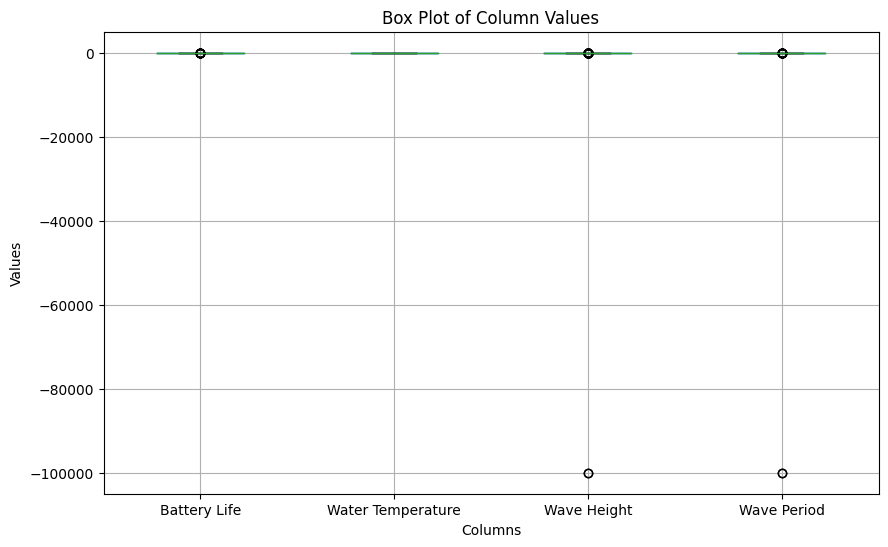

In [92]:
# Ouliers Detection

# Create box plots for each column in the DataFrame
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

data[['Battery Life','Water Temperature','Wave Height','Wave Period']].boxplot()

# Set the title and labels
plt.title('Box Plot of Column Values')
plt.xlabel('Columns')
plt.ylabel('Values')

# Show the plot
plt.show()

Few Values were in the range of -999 for Wave Height column. They does not look appropriate, so removing them.

In [93]:
data = data.drop(data.loc[data['Wave Height']<-999,:].index)

### Dropping unwanted columns
Dropping the columns **Beach Name, Measurement Timestamp Label,Measurement ID** because they are not numericals and are not helpful in dimensionality reduction.

In [94]:
data = data.drop(columns=['Measurement Timestamp Label','Measurement ID'])

In [95]:
data_sorted = data.sort_values(by=['Beach Name','Measurement Timestamp'])

In [96]:
data_sorted

,Beach Name,Measurement Timestamp,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life
267,63rd Street Beach,2015-05-30 00:00:00,12.9,1.19,0.091,4,11.1
250,63rd Street Beach,2015-05-30 02:00:00,12.4,1.15,0.075,7,11.1
251,63rd Street Beach,2015-05-30 03:00:00,12.4,1.04,0.067,6,11.1
252,63rd Street Beach,2015-05-30 04:00:00,12.4,1.06,0.091,4,11.1
253,63rd Street Beach,2015-05-30 05:00:00,12.4,0.98,0.088,4,11.1
...,...,...,...,...,...,...,...
1235,Rainbow Beach,2015-09-29 17:00:00,19.0,53.26,0.740,7,10.7
1236,Rainbow Beach,2015-09-29 18:00:00,18.6,36.87,0.685,7,10.7
1237,Rainbow Beach,2015-09-29 20:00:00,18.1,53.14,0.717,7,10.7
1239,Rainbow Beach,2015-09-30 05:00:00,17.8,44.90,0.691,7,10.5


In [97]:
data_sorted['Beach Name'].unique()

array(['63rd Street Beach', 'Calumet Beach', 'Montrose Beach',
       'Ohio Street Beach', 'Osterman Beach', 'Rainbow Beach'],
      dtype=object)

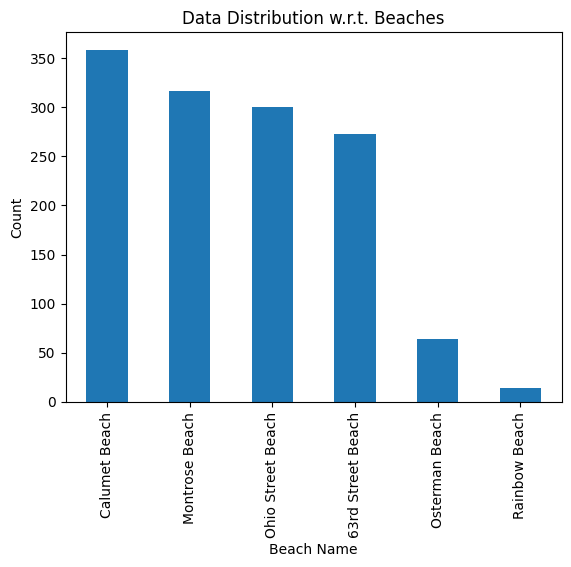

In [98]:
data_sorted['Beach Name'].value_counts().plot(kind='bar')
plt.xlabel('Beach Name')
plt.ylabel('Count')
plt.title('Data Distribution w.r.t. Beaches')
plt.show()

In [99]:
data_sorted.to_csv("/content/drive/MyDrive/UALR/GA/GA/Data1/Umap_Data_Manipulation/data_sorted.csv")

### Label Encoding
Performing label encoding to convert categorical data in Beach Name column to numeric

In [100]:
lblEn = LabelEncoder()

data_sorted['Beach Name'] =lblEn.fit_transform(data_sorted['Beach Name'])

In [121]:
lblEn.inverse_transform(np.array([0, 1, 2, 3,4,5]))
# lblEn.inverse_transform(np.array([0, 1, 2, 3, 4, 5]))
# data_sorted['Beach Name'].uni que()

array(['63rd Street Beach', 'Calumet Beach', 'Montrose Beach',
       'Ohio Street Beach', 'Osterman Beach', 'Rainbow Beach'],
      dtype=object)

In [102]:
num_cols = ['Water Temperature','Turbidity','Wave Height','Wave Period','Battery Life']

In [103]:
data_sorted

,Beach Name,Measurement Timestamp,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life
267,0,2015-05-30 00:00:00,12.9,1.19,0.091,4,11.1
250,0,2015-05-30 02:00:00,12.4,1.15,0.075,7,11.1
251,0,2015-05-30 03:00:00,12.4,1.04,0.067,6,11.1
252,0,2015-05-30 04:00:00,12.4,1.06,0.091,4,11.1
253,0,2015-05-30 05:00:00,12.4,0.98,0.088,4,11.1
...,...,...,...,...,...,...,...
1235,5,2015-09-29 17:00:00,19.0,53.26,0.740,7,10.7
1236,5,2015-09-29 18:00:00,18.6,36.87,0.685,7,10.7
1237,5,2015-09-29 20:00:00,18.1,53.14,0.717,7,10.7
1239,5,2015-09-30 05:00:00,17.8,44.90,0.691,7,10.5


### Standardizing the numeric columns

In [104]:
scaler = StandardScaler()
data_sorted[num_cols] = scaler.fit_transform(data_sorted[num_cols])

In [105]:
data_sorted

,Beach Name,Measurement Timestamp,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life
267,0,2015-05-30 00:00:00,-1.863108,-0.465288,-0.804711,-0.136747,-0.011031
250,0,2015-05-30 02:00:00,-2.045236,-0.470088,-0.946751,1.642303,-0.011031
251,0,2015-05-30 03:00:00,-2.045236,-0.483290,-1.017771,1.049286,-0.011031
252,0,2015-05-30 04:00:00,-2.045236,-0.480890,-0.804711,-0.136747,-0.011031
253,0,2015-05-30 05:00:00,-2.045236,-0.490491,-0.831343,-0.136747,-0.011031
...,...,...,...,...,...,...,...
1235,5,2015-09-29 17:00:00,0.358847,5.784055,4.956804,1.642303,-0.752223
1236,5,2015-09-29 18:00:00,0.213145,3.816958,4.468540,1.642303,-0.752223
1237,5,2015-09-29 20:00:00,0.031018,5.769652,4.752621,1.642303,-0.752223
1239,5,2015-09-30 05:00:00,-0.078259,4.780703,4.521805,1.642303,-1.122818


In [106]:
data_sorted.isna().sum()

Beach Name               0
Measurement Timestamp    0
Water Temperature        0
Turbidity                0
Wave Height              0
Wave Period              0
Battery Life             0
dtype: int64

### Converting the timestamp to numerical values

In [107]:
data_sorted['Measurement Timestamp'] = data_sorted['Measurement Timestamp'].apply(lambda x: x.timestamp())

In [108]:
data_sorted['Measurement Timestamp']

267     1.432944e+09
250     1.432951e+09
251     1.432955e+09
252     1.432958e+09
253     1.432962e+09
            ...     
1235    1.443546e+09
1236    1.443550e+09
1237    1.443557e+09
1239    1.443589e+09
1240    1.443593e+09
Name: Measurement Timestamp, Length: 1327, dtype: float64

In [109]:
data_sorted.isna().sum()

Beach Name               0
Measurement Timestamp    0
Water Temperature        0
Turbidity                0
Wave Height              0
Wave Period              0
Battery Life             0
dtype: int64

### Processing Null values
There are few null values present in Wave Height and Wave Period Column, we need to fill them or else eliminate them. I am filling them using KNNImputer

In [110]:
# Using KNNImputer to impute the missing values with the nearest 3 neighbors and creating a new dataframe to store
# updated data

imputer=KNNImputer(n_neighbors=3, weights='uniform',missing_values=np.nan)

new_array=imputer.fit_transform(data_sorted) # impute the missing values
    # convert the nd-array returned in the step above to a Dataframe

# data_sorted=pd.DataFrame(data=np.round(new_array), columns=data_sorted.columns)
data_sorted=pd.DataFrame(data=new_array, columns=data_sorted.columns)

In [111]:
data_sorted

,Beach Name,Measurement Timestamp,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life
0,0.0,1.432944e+09,-1.863108,-0.465288,-0.804711,-0.136747,-0.011031
1,0.0,1.432951e+09,-2.045236,-0.470088,-0.946751,1.642303,-0.011031
2,0.0,1.432955e+09,-2.045236,-0.483290,-1.017771,1.049286,-0.011031
3,0.0,1.432958e+09,-2.045236,-0.480890,-0.804711,-0.136747,-0.011031
4,0.0,1.432962e+09,-2.045236,-0.490491,-0.831343,-0.136747,-0.011031
...,...,...,...,...,...,...,...
1322,5.0,1.443546e+09,0.358847,5.784055,4.956804,1.642303,-0.752223
1323,5.0,1.443550e+09,0.213145,3.816958,4.468540,1.642303,-0.752223
1324,5.0,1.443557e+09,0.031018,5.769652,4.752621,1.642303,-0.752223
1325,5.0,1.443589e+09,-0.078259,4.780703,4.521805,1.642303,-1.122818


##UMAP

In [112]:
# Apply UMAP to the entire DataFrame

SEED = 43
reducer = umap.UMAP(random_state=SEED,
                    n_neighbors = 5,
                    n_components = 2,
                    min_dist = 0.7)
# reducer = umap.UMAP(random_state=SEED)

umap_result = reducer.fit_transform(data_sorted)

umap_result

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


array([[12.677165  , 16.722279  ],
       [12.525818  , 16.51746   ],
       [12.571902  , 16.4282    ],
       ...,
       [ 0.2741637 , 12.211723  ],
       [ 0.28138682, 12.376951  ],
       [ 0.18299763, 12.276509  ]], dtype=float32)

### Visualizing the UMAP output

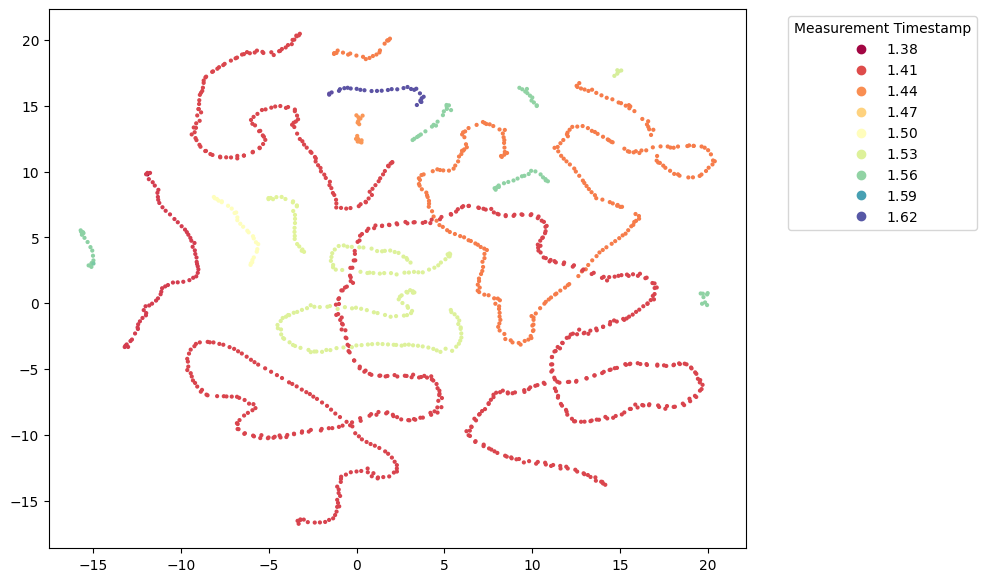

In [113]:
fig, ax = plt.subplots(figsize=(9, 7))

scatter = plt.scatter(umap_result[:, 0], umap_result[:, 1], c=data_sorted['Measurement Timestamp'], s=4, cmap='Spectral');

# Add a legend
plt.legend(*scatter.legend_elements(), title='Measurement Timestamp',bbox_to_anchor=(1.05, 1), loc='upper left')

# plt.show()

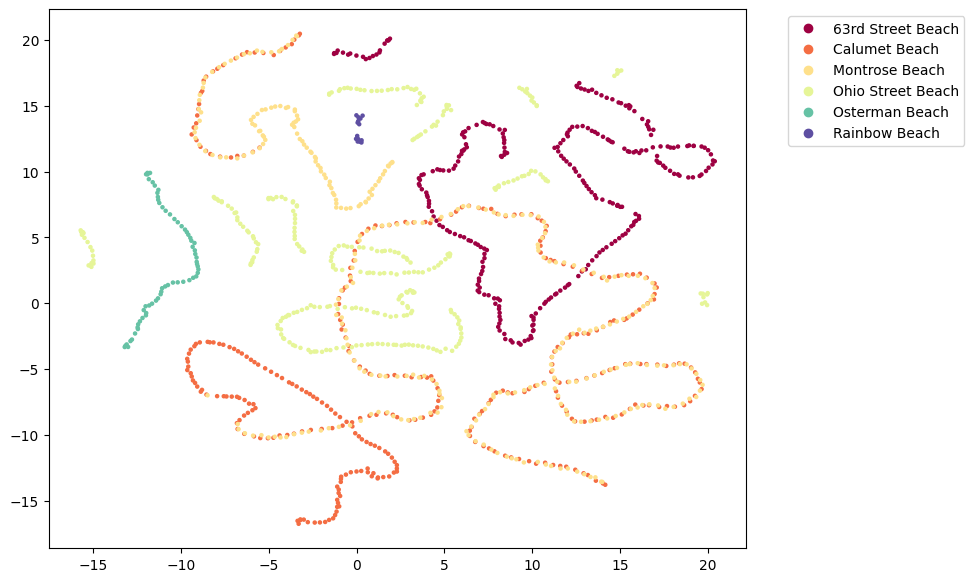

In [114]:
fig, ax = plt.subplots(figsize=(9, 7))


scatter = plt.scatter(umap_result[:, 0], umap_result[:, 1], c=data_sorted['Beach Name'] , s=5, cmap='Spectral')

# Create a legend using the unique beach names
legend_labels = ['63rd Street Beach', 'Calumet Beach', 'Montrose Beach', 'Ohio Street Beach', 'Osterman Beach', 'Rainbow Beach']
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels,bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

In [115]:
data_sorted

,Beach Name,Measurement Timestamp,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life
0,0.0,1.432944e+09,-1.863108,-0.465288,-0.804711,-0.136747,-0.011031
1,0.0,1.432951e+09,-2.045236,-0.470088,-0.946751,1.642303,-0.011031
2,0.0,1.432955e+09,-2.045236,-0.483290,-1.017771,1.049286,-0.011031
3,0.0,1.432958e+09,-2.045236,-0.480890,-0.804711,-0.136747,-0.011031
4,0.0,1.432962e+09,-2.045236,-0.490491,-0.831343,-0.136747,-0.011031
...,...,...,...,...,...,...,...
1322,5.0,1.443546e+09,0.358847,5.784055,4.956804,1.642303,-0.752223
1323,5.0,1.443550e+09,0.213145,3.816958,4.468540,1.642303,-0.752223
1324,5.0,1.443557e+09,0.031018,5.769652,4.752621,1.642303,-0.752223
1325,5.0,1.443589e+09,-0.078259,4.780703,4.521805,1.642303,-1.122818


### Exporting the UMAP output to excel

In [116]:
# Creating the dataframe from the array umap_result
# umap_result_df = pd.DataFrame(umap_result,columns=['UMAP-0','UMAP-1','UMAP-2'])
umap_result_df = pd.DataFrame(umap_result,columns=['UMAP-0','UMAP-1'])

In [117]:
umap_result_df

,UMAP-0,UMAP-1
0,12.677165,16.722279
1,12.525818,16.517460
2,12.571902,16.428200
3,12.774878,16.313227
4,12.980811,16.235567
...,...,...
1322,0.086269,12.477296
1323,0.060766,12.285553
1324,0.274164,12.211723
1325,0.281387,12.376951


In [118]:
# Saving the two pandas dataframes data_sorted_label_enc and umap_result_df into data_sorted_label_enc_out using concat function of pandas

data_sorted = pd.concat([data_sorted,umap_result_df], axis=1)

In [119]:
# Exporting the csv file
data_sorted.to_csv("/content/drive/MyDrive/UALR/GA/GA/Repository/paraview/umap/backup/new.csv")

In [120]:
data_sorted

,Beach Name,Measurement Timestamp,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life,UMAP-0,UMAP-1
0,0.0,1.432944e+09,-1.863108,-0.465288,-0.804711,-0.136747,-0.011031,12.677165,16.722279
1,0.0,1.432951e+09,-2.045236,-0.470088,-0.946751,1.642303,-0.011031,12.525818,16.517460
2,0.0,1.432955e+09,-2.045236,-0.483290,-1.017771,1.049286,-0.011031,12.571902,16.428200
3,0.0,1.432958e+09,-2.045236,-0.480890,-0.804711,-0.136747,-0.011031,12.774878,16.313227
4,0.0,1.432962e+09,-2.045236,-0.490491,-0.831343,-0.136747,-0.011031,12.980811,16.235567
...,...,...,...,...,...,...,...,...,...
1322,5.0,1.443546e+09,0.358847,5.784055,4.956804,1.642303,-0.752223,0.086269,12.477296
1323,5.0,1.443550e+09,0.213145,3.816958,4.468540,1.642303,-0.752223,0.060766,12.285553
1324,5.0,1.443557e+09,0.031018,5.769652,4.752621,1.642303,-0.752223,0.274164,12.211723
1325,5.0,1.443589e+09,-0.078259,4.780703,4.521805,1.642303,-1.122818,0.281387,12.376951
